In [2]:
# source of this code: https://www.youtube.com/watch?v=JoQx39CoXW8

import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [1]:
! ls

cat.jpeg  sample_data  sword.jpeg


In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions

In [0]:
from keras import backend as K

In [5]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.
96116736/96112376 [==============================] - 12s 0us/step


In [6]:
iv3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
from keras.preprocessing import image

In [8]:
x = image.img_to_array(image.load_img("cat.jpeg", target_size=(299,299)))

x.shape

(299, 299, 3)

In [0]:
# reshape the image from 0 ,255 to -1, 1
x /= 255
x -= 0.5
x *= 2

In [10]:
# add one dimention to array, because this is necessary to pass the image to the model
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

x.shape

(1, 299, 299, 3)

In [0]:
y = iv3.predict(x)

In [12]:
# 1000 is the number of labels in the output

y.shape

(1, 1000)

In [13]:
decode_predictions(y)  #show the name of the most probably label for the prediction

40960/35363 [==================================] - 0s 5us/step


[[('n02123045', 'tabby', 0.4070584),
  ('n02124075', 'Egyptian_cat', 0.38354096),
  ('n02123159', 'tiger_cat', 0.09202613),
  ('n02127052', 'lynx', 0.05102553),
  ('n04553703', 'washbasin', 0.0010633447)]]

In [14]:
x = image.img_to_array(image.load_img("sword.jpeg", target_size=(299,299)))

# reshape the image from 0 ,255 to -1, 1
x /= 255
x -= 0.5
x *= 2

# add one dimention to array, because this is necessary to pass the image to the model
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x)

decode_predictions(y)

[[('n04141327', 'scabbard', 0.93252677),
  ('n03658185', 'letter_opener', 0.041287456),
  ('n02783161', 'ballpoint', 0.009668878),
  ('n04192698', 'shield', 0.00040614704),
  ('n03000247', 'chain_mail', 0.0003875277)]]

<b>--------------------</b>
<b>adversarial attack</b>
<b>--------------------</b>

In [15]:
inp_layer = iv3.layers[0].input # get the input point of the first layer
out_layer = iv3.layers[-1].output # get the output point of the last layer

print(inp_layer)
print(out_layer)

Tensor("input_1:0", shape=(?, 299, 299, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(?, 1000), dtype=float32)


In [16]:
target_class = 951 # class that we want to use to cheat the neurla network

loss = out_layer[0, target_class] # we want to use target_class to maximise the cost, in this case lemon

# gradient 

grad = K.gradients(loss, inp_layer)[0] # calculates the gradient graph between loss and inp_layer


optimizer_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

Instructions for updating:
Use tf.cast instead.


In [0]:
cost = 0.0


x = image.img_to_array(image.load_img("cat.jpeg", target_size=(299,299)))

# reshape the image from 0 ,255 to -1, 1
x /= 255
x -= 0.5
x *= 2

# add one dimention to array, because this is necessary to pass the image to the model
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

adv = np.copy(x)

pert = 0.01

max_pert = x + 0.01
min_pert = x - 0.01

In [25]:
while cost < 0.95:
    gr, cost = optimizer_gradient([adv, 0])
    
    adv += gr
    
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    
    print("target cost:", cost)

hacked = np.copy(adv)

target cost: 7.050032e-05
target cost: 7.0641465e-05
target cost: 7.080296e-05
target cost: 7.098629e-05
target cost: 7.117663e-05
target cost: 7.136914e-05
target cost: 7.1563525e-05
target cost: 7.175683e-05
target cost: 7.195078e-05
target cost: 7.214508e-05
target cost: 7.2342016e-05
target cost: 7.253989e-05
target cost: 7.273982e-05
target cost: 7.293953e-05
target cost: 7.31401e-05
target cost: 7.334249e-05
target cost: 7.354767e-05
target cost: 7.37534e-05
target cost: 7.3961346e-05
target cost: 7.4170566e-05
target cost: 7.438306e-05
target cost: 7.459961e-05
target cost: 7.481845e-05
target cost: 7.5034885e-05
target cost: 7.52506e-05
target cost: 7.546426e-05
target cost: 7.5682605e-05
target cost: 7.590037e-05
target cost: 7.6116754e-05
target cost: 7.633284e-05
target cost: 7.65487e-05
target cost: 7.676438e-05
target cost: 7.697944e-05
target cost: 7.719539e-05
target cost: 7.741255e-05
target cost: 7.763196e-05
target cost: 7.7851786e-05
target cost: 7.807254e-05
target 

In [0]:
# reverting the image scaling
adv /= 2
adv +=0.5
adv *= 255

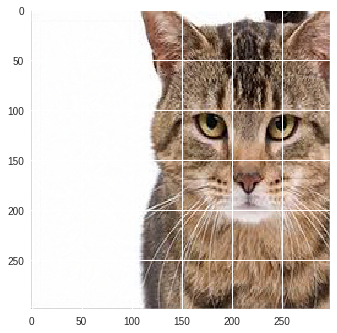

In [27]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [0]:
from PIL import Image

im = Image.fromarray(adv[0].astype(np.uint8))
im.save("hacked.png")

In [31]:
# try to predict with the hacked image

x = image.img_to_array(image.load_img("hacked.png", target_size=(299,299)))

# reshape the image from 0 ,255 to -1, 1
x /= 255
x -= 0.5
x *= 2

# add one dimention to array, because this is necessary to pass the image to the model
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x)

decode_predictions(y)

[[('n07749582', 'lemon', 0.9703957),
  ('n07747607', 'orange', 0.00744738),
  ('n07742313', 'Granny_Smith', 0.0055760536),
  ('n07718472', 'cucumber', 0.0026842728),
  ('n04409515', 'tennis_ball', 0.0020540503)]]